In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torchvision
from torchvision import transforms

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(filenames)} images in '{dirpath}'.")

image_path = "/content/drive/MyDrive/MRI Dataset Combined/"
walk_through_dir(image_path)

There are 0 images in '/content/drive/MyDrive/MRI Dataset Combined/'.
There are 29 images in '/content/drive/MyDrive/MRI Dataset Combined/Glioblastoma'.
There are 31 images in '/content/drive/MyDrive/MRI Dataset Combined/Carcinoma'.
There are 27 images in '/content/drive/MyDrive/MRI Dataset Combined/Ganglioglioma'.
There are 28 images in '/content/drive/MyDrive/MRI Dataset Combined/Ependimoma'.
There are 24 images in '/content/drive/MyDrive/MRI Dataset Combined/Granuloma'.
There are 57 images in '/content/drive/MyDrive/MRI Dataset Combined/Astrocitoma'.
There are 28 images in '/content/drive/MyDrive/MRI Dataset Combined/Germinoma'.
There are 45 images in '/content/drive/MyDrive/MRI Dataset Combined/Neurocitoma'.
There are 87 images in '/content/drive/MyDrive/MRI Dataset Combined/Meningioma'.
There are 33 images in '/content/drive/MyDrive/MRI Dataset Combined/Meduloblastoma'.
There are 30 images in '/content/drive/MyDrive/MRI Dataset Combined/Tuberculoma'.
There are 33 images in '/conte

In [ ]:
import random
from PIL import Image
import glob
from pathlib import Path

random.seed(42)

random_image_path = '/content/drive/MyDrive/MRI Dataset Combined/Astrocitoma/01b3fffa-92e0-4937-8fcd-16cedf763ce9.jpg'

image_class = Path(random_image_path).parent.stem

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")

Random image path: /content/drive/MyDrive/MRI Dataset Combined/Astrocitoma/01b3fffa-92e0-4937-8fcd-16cedf763ce9.jpg
Image class: Astrocitoma
Image height: 570
Image width: 440


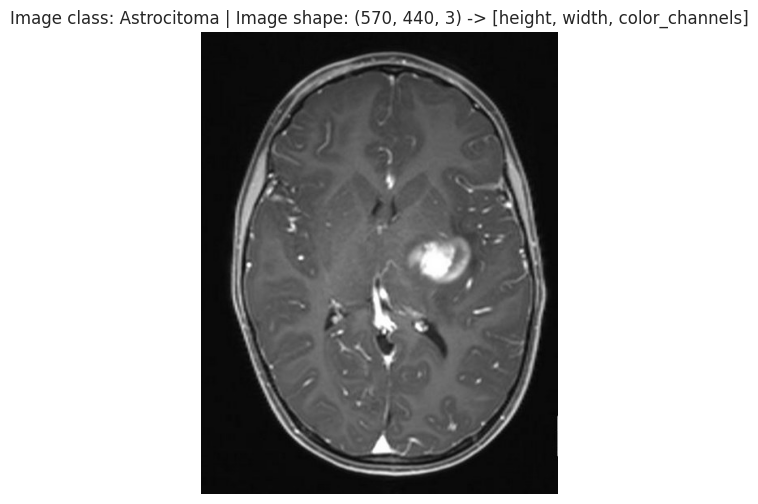

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

img_as_array = np.asarray(img)

plt.figure(figsize=(8, 6))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

IMAGE_WIDTH=512
IMAGE_HEIGHT=512
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)

data_transform = transforms.Compose([
    transforms.Resize(size=IMAGE_SIZE),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor()
])

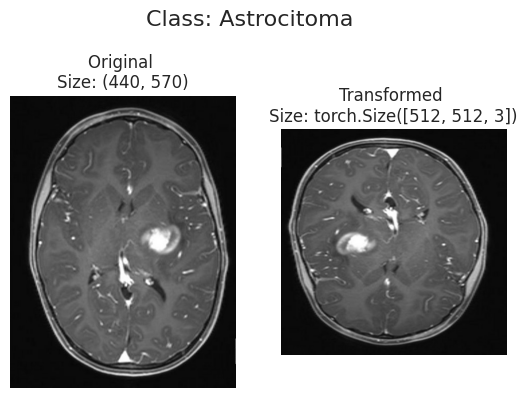

In [ ]:
def plot_transformed_images(image_path, transform, n=3, seed=42):
  with Image.open(image_path) as f:
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(f)
    ax[0].set_title(f"Original \nSize: {f.size}")
    ax[0].axis("off")
    transformed_image = transform(f).permute(1, 2, 0)
    ax[1].imshow(transformed_image)
    ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
    ax[1].axis("off")
    fig.suptitle(f"Class: {Path(random_image_path).parent.stem}", fontsize=16)

plot_transformed_images(random_image_path, transform=data_transform, n=3)

In [ ]:
from torchvision import datasets

train_data = datasets.ImageFolder(root="/content/drive/MyDrive/MRI Dataset Combined/", # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None)

print(f"Train data:\n{train_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 574
    Root location: /content/drive/MyDrive/MRI Dataset Combined/
    StandardTransform
Transform: Compose(
               Resize(size=(512, 512), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               ToTensor()
           )


In [ ]:
class_names = train_data.classes
print("Class names: ",class_names)

class_dict = train_data.class_to_idx
print("Class names as a dict: ",class_dict)

print("The length of the training set: ", len(train_data))

Class names:  ['Astrocitoma', 'Carcinoma', 'Ependimoma', 'Ganglioglioma', 'Germinoma', 'Glioblastoma', 'Granuloma', 'Meduloblastoma', 'Meningioma', 'Neurocitoma', 'Oligodendroglioma', 'Papiloma', 'Schwannoma', 'Tuberculoma', '_NORMAL']
Class names as a dict:  {'Astrocitoma': 0, 'Carcinoma': 1, 'Ependimoma': 2, 'Ganglioglioma': 3, 'Germinoma': 4, 'Glioblastoma': 5, 'Granuloma': 6, 'Meduloblastoma': 7, 'Meningioma': 8, 'Neurocitoma': 9, 'Oligodendroglioma': 10, 'Papiloma': 11, 'Schwannoma': 12, 'Tuberculoma': 13, '_NORMAL': 14}
The length of the training set:  574


In [ ]:
print(train_data[0][0].shape)

torch.Size([3, 512, 512])


In [ ]:
print(train_data[0][1], type(train_data[0][1]))

0 <class 'int'>


In [ ]:
len(train_data)

574

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from PIL import Image
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
plt.style.use("ggplot")
%config InlineBackend.figure_formats = ['svg']

import os
from torchvision.io import read_image, ImageReadMode
import torch
import torchvision.transforms.functional as F
from torch.utils.data import Dataset,random_split
from torchvision.utils import make_grid

from torchvision import datasets
import torchvision.transforms as tr
from pathlib import Path

torch.manual_seed(42)

In [ ]:
sz=224

In [ ]:
class BrainDataset(Dataset):

    def __init__(self, base_dir, transforms = None):
        """
        Arguments:
            base_dir: str
                Directory where the dataset is stored
            transforms: iterable
                Collection of transforms to apply when loading an image
        """

        self.base_dir = Path(base_dir)
        self.transforms = transforms

        self.data_dicts = []
        for img in self.base_dir.glob("*oma*/*.jp*g"):
          # Get all images of sick patients, every tumor name contains "oma"
            img_dict = {}
            img_dict["img_path"] = img
            img_dict["label"] = img.parent.name.split(" ")[0]
            self.data_dicts.append(img_dict)

        for img in self.base_dir.glob("*NORMAL*/*.jp*g"):
            # Get all images of normal patients
            img_dict = {}
            img_dict["img_path"] = img
            img_dict["label"] = "Normal"
            self.data_dicts.append(img_dict)

        self.data = pd.DataFrame(self.data_dicts)
        self.labels = self.data["label"]
        self.encoder = LabelEncoder()
        self.y = self.encoder.fit_transform(self.labels)
        self.num_classes = len(self.encoder.classes_)


    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):

        image = read_image(str(self.data.loc[idx,"img_path"]),mode=ImageReadMode.RGB) # read image into a Tensor
        # image = Image.open(self.data.loc[idx,"img_path"]).convert("RGB") # read image into a PIL Image
        label = self.y[idx]
        if self.transforms is not None:
            return self.transforms(image), label
        else:
            return image, label


    def display(self,idxs):
        """
        Display a few images from the dataset.
        Arguments:
            idxs: iterable
                Collection of indices of the images that will be displayed
        Returns:
            fig, axs:
                Matplotlib Figure and List(Axes) where the images are rendered
        Example:
            BrainDataset().display([1,2])
        """

        img_list = [F.to_pil_image(self[idx][0]) for idx in idxs]

        labels = [self.labels[idx] for idx in idxs]

        fig,axs = plt.subplots(ncols=len(idxs),nrows=1,squeeze=False,figsize=(10,len(idxs)*16))

        for i,ax in enumerate(axs.flat):
            ax.imshow(img_list[i],cmap='gray')
            ax.set_title(labels[i],size=8)
            ax.grid()
            ax.axis('off')
        return fig,axs

    def _ipython_display_(self):
        # Render the underlying DataFrame when asked to display self in a notebook
        display(self.data)

In [ ]:
#base_dir = Path('/content/drive/MyDrive/MRI Dataset Combined')
base_dir = Path('/content/drive/Shareddrives/InterIIT/MRI Dataset Combined')
brain_data = BrainDataset(base_dir,transforms=tr.Resize(size=sz))

In [ ]:
len(brain_data)

573

In [ ]:
type(brain_data)

__main__.BrainDataset

In [ ]:
brain_data

,img_path,label
0,/content/drive/Shareddrives/InterIIT/MRI Datas...,Glioblastoma
1,/content/drive/Shareddrives/InterIIT/MRI Datas...,Glioblastoma
2,/content/drive/Shareddrives/InterIIT/MRI Datas...,Glioblastoma
3,/content/drive/Shareddrives/InterIIT/MRI Datas...,Glioblastoma
4,/content/drive/Shareddrives/InterIIT/MRI Datas...,Glioblastoma
...,...,...
568,/content/drive/Shareddrives/InterIIT/MRI Datas...,Normal
569,/content/drive/Shareddrives/InterIIT/MRI Datas...,Normal
570,/content/drive/Shareddrives/InterIIT/MRI Datas...,Normal
571,/content/drive/Shareddrives/InterIIT/MRI Datas...,Normal


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


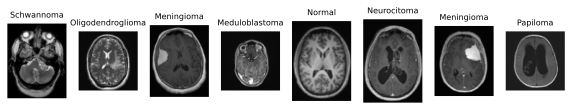

In [ ]:
idxs = np.random.choice(len(brain_data),size=8)
brain_data.display(idxs);

In [ ]:
brain_data.data.describe()

,img_path,label
count,573,573
unique,573,15
top,/content/drive/Shareddrives/InterIIT/MRI Datas...,Meningioma
freq,1,87


In [ ]:
d=pd.DataFrame(brain_data.data.describe())
d

,img_path,label
count,573,573
unique,573,15
top,/content/drive/MyDrive/MRI Dataset Combined/Gl...,Meningioma
freq,1,87


In [ ]:
d['img_path']['top']

PosixPath('/content/drive/MyDrive/MRI Dataset Combined/Glioblastoma/8cc07bbc-77f8-46bf-bd4f-d9e39f581b87.jpeg')

In [ ]:
px.histogram(brain_data.data,x="label")

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


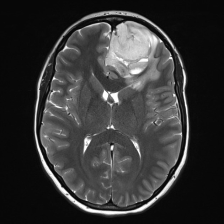

In [ ]:
F.to_pil_image(brain_data[500][0])

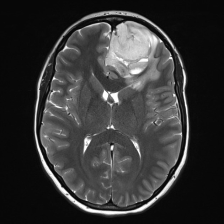

In [ ]:
img.crop(img.getbbox())

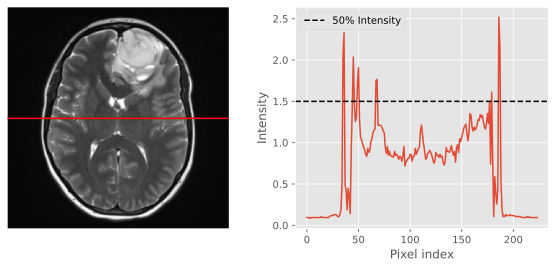

In [ ]:
imgT = tr.ToTensor()(img)[:,:,]
C,H,W = imgT.shape

fig,ax = plt.subplots(1,2,figsize=(10,4))

ax[0].imshow(img)
ax[0].axhline(H//2,color="red")
ax[0].grid()
ax[0].axis("off");

ax[1].plot(torch.sum(imgT[:,H//2,:],axis=0))
ax[1].set_xlabel("Pixel index")
ax[1].set_ylabel("Intensity")
ax[1].axhline(0.5*torch.max(torch.sum(imgT,axis=0)),color="Black",label="50% Intensity",linestyle="--")
ax[1].legend();

In [ ]:
class CropToContent(torch.nn.Module):

    def __init__(self,threshold=0.1,ignore_frame_pixels=5):
        super().__init__()
        self.threshold = threshold
        self.ignore_frame_pixels = ignore_frame_pixels if ignore_frame_pixels > 0 else None

    def forward(self, img):
        """
        Args:
            img (PIL Image or Tensor): Image to be cropped.
        Returns:
            Tensor: Cropped image.
        """

        C,H,W = img.shape
        skipH = self.ignore_frame_pixels
        skipT = -self.ignore_frame_pixels if self.ignore_frame_pixels is not None else None

        ymax = torch.max(torch.sum(img[:,H//2,skipH:skipT],axis=0))
        xmax = torch.max(torch.sum(img[:,skipH:skipT,W//2],axis=0))

        bottom, top = torch.nonzero(torch.sum(img[:,H//2,skipH:skipT],axis=0) > self.threshold*ymax)[[0,-1]]
        left, right = torch.nonzero(torch.sum(img[:,skipH:skipT,W//2],axis=0) > self.threshold*xmax)[[0,-1]]

        return F.center_crop(img,output_size=[(right-left).item(),(top-bottom).item()])

    def __repr__(self):
        return f"CropToContent(threshold={self.threshold})"

In [ ]:
brain_data = BrainDataset(base_dir,transforms=tr.Compose([
    CropToContent(threshold=0.1,ignore_frame_pixels=5),
    tr.Resize([sz,sz])]))

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


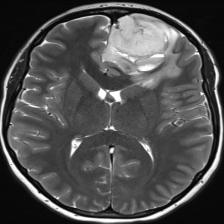

In [ ]:
F.to_pil_image(brain_data[500][0])

In [ ]:
class_counts = brain_data.data.label.value_counts()
class_weights = 1 / class_counts
sample_weights = [1/class_counts[i] for i in brain_data.data.label.values]
sample_weights

In [ ]:
from torch.utils.data import WeightedRandomSampler
from torch.utils.data import DataLoader
sampler = WeightedRandomSampler(weights = sample_weights, num_samples = 2*len(brain_data), replacement = True)
train_loader = DataLoader(brain_data, sampler = sampler, batch_size = 32)

In [ ]:
from torch.utils.data import DataLoader
train_loader = DataLoader(brain_data, batch_size=32, shuffle=True, num_workers=2)
class_weights = len(train_loader)*class_weights

In [ ]:
class_weights

Meningioma           0.206897
Astrocitoma          0.315789
Normal               0.346154
Schwannoma           0.391304
Neurocitoma          0.400000
Meduloblastoma       0.545455
Papiloma             0.545455
Carcinoma            0.600000
Tuberculoma          0.600000
Glioblastoma         0.620690
Ependimoma           0.642857
Germinoma            0.642857
Ganglioglioma        0.666667
Granuloma            0.750000
Oligodendroglioma    0.750000
Name: label, dtype: float64

In [ ]:
class_weights = torch.Tensor(class_weights)
class_weights

tensor([0.2069, 0.3158, 0.3462, 0.3913, 0.4000, 0.5455, 0.5455, 0.6000, 0.6000,
        0.6207, 0.6429, 0.6429, 0.6667, 0.7500, 0.7500])

In [ ]:
mapping = dict(zip(brain_data.encoder.classes_,range(len(brain_data.encoder.classes_))))
dict2 = {}

dict2 = dict([(v, [k for k, v1 in mapping.items() if v1 == v])
              for v in set(mapping.values())])
mapping = dict2
mapping

{0: ['Astrocitoma'],
 1: ['Carcinoma'],
 2: ['Ependimoma'],
 3: ['Ganglioglioma'],
 4: ['Germinoma'],
 5: ['Glioblastoma'],
 6: ['Granuloma'],
 7: ['Meduloblastoma'],
 8: ['Meningioma'],
 9: ['Neurocitoma'],
 10: ['Normal'],
 11: ['Oligodendroglioma'],
 12: ['Papiloma'],
 13: ['Schwannoma'],
 14: ['Tuberculoma']}

In [ ]:
32*len(train_loader)

1152

In [ ]:
from torchvision.models import inception_v3, Inception_V3_Weights

incept = inception_v3(weights='DEFAULT')
for param in incept.parameters():
    param.requires_grad = False

print(incept.aux_logits)
incept.aux_logits = False
print(incept.aux_logits)

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 223MB/s] 


True
False


In [ ]:
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
from torchvision.models._api import WeightsEnum
from torch.hub import load_state_dict_from_url

def get_state_dict(self, *args, **kwargs):
    kwargs.pop("check_hash")
    return load_state_dict_from_url(self.url, *args, **kwargs)
WeightsEnum.get_state_dict = get_state_dict

eff = efficientnet_b0(weights='DEFAULT')

eff

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
import torch.nn as nn
import torch.nn.functional
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = torch.nn.functional.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = torch.nn.functional.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
class MRImodel(ImageClassificationBase):
    def __init__(self,transforms):
        super().__init__()

        self.model = torch.nn.Sequential(
                    transforms,
                    eff,
                    torch.nn.Linear(
                        1000,
                        15)
                    )


    def forward(self, data):
        out = self.model(data)
        return out

In [ ]:
from torchvision.models import EfficientNet_B0_Weights
eff_transforms = EfficientNet_B0_Weights.IMAGENET1K_V1.transforms()
transforms = torch.nn.Sequential(
     tr.RandomHorizontalFlip(),
     tr.RandomRotation(15),
     eff_transforms,
)
transforms

Sequential(
  (0): RandomHorizontalFlip(p=0.5)
  (1): RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
  (2): ImageClassification(
      crop_size=[224]
      resize_size=[256]
      mean=[0.485, 0.456, 0.406]
      std=[0.229, 0.224, 0.225]
      interpolation=InterpolationMode.BICUBIC
  )
)

In [ ]:
incept_transform = Inception_V3_Weights.IMAGENET1K_V1.transforms()
transforms = torch.nn.Sequential(
     tr.RandomHorizontalFlip(),
     tr.RandomRotation(15),
     incept_transform,
)
transforms

Sequential(
  (0): RandomHorizontalFlip(p=0.5)
  (1): RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
  (2): ImageClassification(
      crop_size=[299]
      resize_size=[342]
      mean=[0.485, 0.456, 0.406]
      std=[0.229, 0.224, 0.225]
      interpolation=InterpolationMode.BILINEAR
  )
)

In [ ]:
model = MRImodel(transforms=transforms)
model

MRImodel(
  (model): Sequential(
    (0): Sequential(
      (0): RandomHorizontalFlip(p=0.5)
      (1): RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
      (2): ImageClassification(
          crop_size=[224]
          resize_size=[256]
          mean=[0.485, 0.456, 0.406]
          std=[0.229, 0.224, 0.225]
          interpolation=InterpolationMode.BICUBIC
      )
    )
    (1): EfficientNet(
      (features): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): SiLU(inplace=True)
        )
        (1): Sequential(
          (0): MBConv(
            (block): Sequential(
              (0): Conv2dNormActivation(
                (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
                (1): BatchNorm2d(32, ep

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
device = get_default_device()
device

device(type='cuda')

In [ ]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

def to_device(data, device): #move tensor to device
  if isinstance(data,(list,tuple)):
    return [to_device(x,device) for x in data]
  return data.to(device, non_blocking=True)

In [ ]:
train_loader = DeviceDataLoader(train_loader, device)
model = to_device(model, device)

In [ ]:
class_weights = to_device(class_weights, device)

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader,
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs,
                                                steps_per_epoch=len(train_loader))

    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            # Gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()

        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam
history=[]

In [ ]:
%%time
history += fit_one_cycle(70, max_lr, model, train_loader, train_loader,
                             grad_clip=grad_clip,
                             weight_decay=weight_decay,
                             opt_func=opt_func)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch [0], train_loss: 2.5368, val_loss: 2.5164, val_acc: 0.1876
Epoch [1], train_loss: 2.0689, val_loss: 1.9313, val_acc: 0.4362
Epoch [2], train_loss: 1.8178, val_loss: 1.6015, val_acc: 0.5375
Epoch [3], train_loss: 1.5679, val_loss: 1.3772, val_acc: 0.6169
Epoch [4], train_loss: 1.4493, val_loss: 1.1695, val_acc: 0.6692
Epoch [5], train_loss: 1.3857, val_loss: 1.1765, val_acc: 0.6338
Epoch [6], train_loss: 1.2095, val_loss: 1.0935, val_acc: 0.6468
Epoch [7], train_loss: 1.2619, val_loss: 0.9798, val_acc: 0.7073
Epoch [8], train_loss: 1.1660, val_loss: 0.9784, val_acc: 0.6994
Epoch [9], train_loss: 1.3189, val_loss: 0.9689, val_acc: 0.6936
Epoch [10], train_loss: 1.3365, val_loss: 0.8997, val_acc: 0.7195
Epoch [11], train_loss: 1.3577, val_loss: 0.9313, val_acc: 0.7115
Epoch [12], train_loss: 1.4592, val_loss: 1.0454, val_acc: 0.6832
Epoch [13], train_loss: 1.7022, val_loss: 1.0486, val_acc: 0.6820
Epoch [14], train_loss: 1.5986, val_loss: 1.1435, val_acc: 0.6614
Epoch [15], train_lo

In [ ]:
%%time
history += fit_one_cycle(20, max_lr, model, train_loader, train_loader,
                             grad_clip=grad_clip,
                             weight_decay=weight_decay,
                             opt_func=opt_func)

Epoch [0], train_loss: 1.1202, val_loss: 0.4758, val_acc: 0.8482
Epoch [1], train_loss: 1.0960, val_loss: 0.5215, val_acc: 0.8342
Epoch [2], train_loss: 1.1405, val_loss: 0.6859, val_acc: 0.7915
Epoch [3], train_loss: 1.4994, val_loss: 0.8244, val_acc: 0.7636
Epoch [4], train_loss: 1.7190, val_loss: 0.9267, val_acc: 0.7421
Epoch [5], train_loss: 1.9300, val_loss: 1.0398, val_acc: 0.7369
Epoch [6], train_loss: 1.9025, val_loss: 0.9782, val_acc: 0.7614
Epoch [7], train_loss: 2.1027, val_loss: 1.0439, val_acc: 0.7437
Epoch [8], train_loss: 1.9267, val_loss: 1.1134, val_acc: 0.7360
Epoch [9], train_loss: 1.8506, val_loss: 1.0962, val_acc: 0.7360
Epoch [10], train_loss: 2.0401, val_loss: 0.9630, val_acc: 0.7486
Epoch [11], train_loss: 1.8158, val_loss: 0.9464, val_acc: 0.7754
Epoch [12], train_loss: 1.8380, val_loss: 0.8786, val_acc: 0.7718
Epoch [13], train_loss: 1.6577, val_loss: 0.8296, val_acc: 0.7792
Epoch [14], train_loss: 1.6417, val_loss: 0.6495, val_acc: 0.8186
Epoch [15], train_lo

In [ ]:
torch.save(model.state_dict(),"/content/drive/Shareddrives/InterIIT/incept_finetuned_unknown.pth")

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [ ]:
plot_accuracies(history)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [ ]:
plot_losses(history)

Training metrics - trained on provided 573 images

In [ ]:
model_loaded = MRImodel(transforms=transforms)
model_loaded.load_state_dict(torch.load("/content/drive/Shareddrives/InterIIT/eff_fully_trained_100_83.pth", map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
model=model_loaded

In [ ]:
32*len(train_loader)

576

In [ ]:
model.eval()

predictions = []
truth = []

with torch.inference_mode():

    for data,true_labels in train_loader:
        pred_labels = torch.argmax(model(data),axis=1)

        predictions.append(pred_labels)
        truth.append(true_labels)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

                   precision    recall  f1-score   support

      Astrocitoma       1.00      1.00      1.00        57
        Carcinoma       1.00      1.00      1.00        30
       Ependimoma       1.00      1.00      1.00        28
    Ganglioglioma       1.00      1.00      1.00        27
        Germinoma       1.00      1.00      1.00        28
     Glioblastoma       1.00      1.00      1.00        29
        Granuloma       1.00      1.00      1.00        24
   Meduloblastoma       1.00      1.00      1.00        33
       Meningioma       1.00      1.00      1.00        87
      Neurocitoma       1.00      1.00      1.00        45
           Normal       1.00      1.00      1.00        52
Oligodendroglioma       1.00      1.00      1.00        24
         Papiloma       1.00      1.00      1.00        33
       Schwannoma       1.00      1.00      1.00        46
      Tuberculoma       1.00      1.00      1.00        30

         accuracy                           1.00      

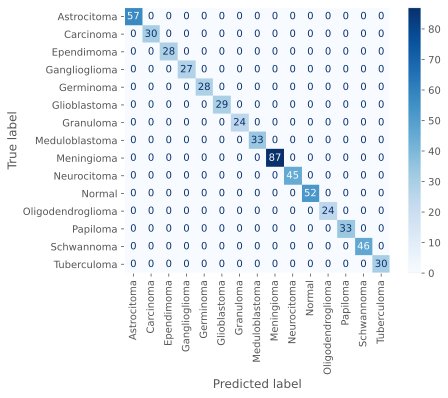

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

print(classification_report(torch.cat(truth).cpu(),torch.cat(predictions).cpu(),target_names=brain_data.encoder.classes_))

ConfusionMatrixDisplay.from_predictions(torch.cat(truth).cpu(),torch.cat(predictions).cpu(),display_labels=brain_data.encoder.classes_,xticks_rotation='vertical',cmap='Blues')
plt.grid(visible=False)

Testing metrics - picked from the web just for testing purposes

In [ ]:
#base_dir = Path('/content/drive/MyDrive/MRI Dataset combined_test')
base_dir = Path('/content/drive/Shareddrives/InterIIT/MRI Dataset combined_test')
test_data = BrainDataset(base_dir,transforms=tr.Resize(size=224))

In [ ]:
test_data = BrainDataset(base_dir,transforms=tr.Compose([
    CropToContent(threshold=0.1,ignore_frame_pixels=5),
    tr.Resize([224,224])]))

In [ ]:
len(test_data)

640

In [ ]:
test_loader = DataLoader(test_data,batch_size=32,shuffle=False,num_workers=2)

In [ ]:
len(test_loader)

20

In [ ]:
model=model_loaded

In [ ]:
model.eval()

predictions = []
truth = []

with torch.inference_mode():

    for data,true_labels in test_loader:
        pred_labels = torch.argmax(model(data),axis=1)
        predictions.append(pred_labels)
        truth.append(true_labels)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

In [ ]:
predictions[7]

tensor([3, 3, 0, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 3, 3, 9, 3, 3, 3, 3, 3, 3, 3,
        4, 4, 4, 4, 4, 8, 4, 9])

In [ ]:
truth[7]

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        4, 4, 4, 4, 4, 4, 4, 4])

                   precision    recall  f1-score   support

      Astrocitoma       0.73      0.74      0.73        50
        Carcinoma       0.96      0.89      0.93        57
       Ependimoma       0.87      0.73      0.80        45
    Ganglioglioma       0.97      0.84      0.90        38
        Germinoma       0.86      0.86      0.86        42
     Glioblastoma       0.94      0.81      0.87        62
        Granuloma       0.95      0.85      0.90        48
   Meduloblastoma       0.95      0.90      0.92        41
       Meningioma       0.46      0.79      0.58        47
      Neurocitoma       0.87      0.90      0.88        58
           Normal       0.85      0.85      0.85        54
Oligodendroglioma       0.89      0.59      0.71        27
         Papiloma       0.88      0.71      0.79        21
       Schwannoma       0.61      0.91      0.73        22
      Tuberculoma       0.92      0.82      0.87        28

         accuracy                           0.82      

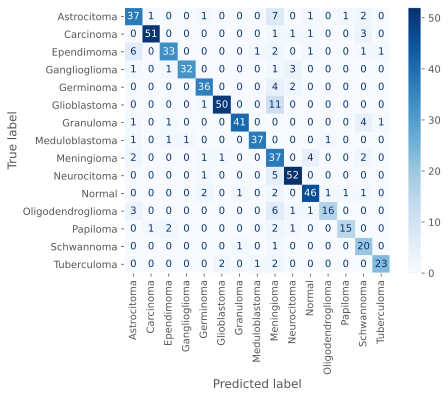

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

print(classification_report(torch.cat(truth).cpu(),torch.cat(predictions).cpu(),target_names=test_data.encoder.classes_))

ConfusionMatrixDisplay.from_predictions(torch.cat(truth).cpu(),torch.cat(predictions).cpu(),display_labels=brain_data.encoder.classes_,xticks_rotation='vertical',cmap='Blues')
plt.grid(visible=False)

Which images are hard to classify?

In [ ]:
model.eval()

with torch.inference_mode():
    for data,label in test_loader:
        pred_labels = torch.argmax(model(data),axis=1)

        idxs = torch.nonzero(pred_labels != label).T[0]

        for i in idxs:
              plt.figure()
              img = data[i]
              plt.imshow(F.to_pil_image(img))
              true = brain_data.encoder.classes_[label[i]]
              pred = brain_data.encoder.classes_[pred_labels[i]]
              plt.axis("off")
              plt.grid()
              plt.title(f"True: {true} Pred: {pred}")

Generating the submission file

In [ ]:
class CropToContent(torch.nn.Module):

    def __init__(self,threshold=0.1,ignore_frame_pixels=5):
        super().__init__()
        self.threshold = threshold
        self.ignore_frame_pixels = ignore_frame_pixels if ignore_frame_pixels > 0 else None

    def forward(self, img):
        """
        Args:
            img (PIL Image or Tensor): Image to be cropped.
        Returns:
            Tensor: Cropped image.
        """

        C,H,W = img.shape
        skipH = self.ignore_frame_pixels
        skipT = -self.ignore_frame_pixels if self.ignore_frame_pixels is not None else None

        ymax = torch.max(torch.sum(img[:,H//2,skipH:skipT],axis=0))
        xmax = torch.max(torch.sum(img[:,skipH:skipT,W//2],axis=0))

        bottom, top = torch.nonzero(torch.sum(img[:,H//2,skipH:skipT],axis=0) > self.threshold*ymax)[[0,-1]]
        left, right = torch.nonzero(torch.sum(img[:,skipH:skipT,W//2],axis=0) > self.threshold*xmax)[[0,-1]]

        return F.center_crop(img,output_size=[(right-left).item(),(top-bottom).item()])

    def __repr__(self):
        return f"CropToContent(threshold={self.threshold})"

In [ ]:
def cropper(img):
  C,H,W = img.shape
  skipH = 5
  skipT = -5

  ymax = torch.max(torch.sum(img[:,H//2,skipH:skipT],axis=0))
  xmax = torch.max(torch.sum(img[:,skipH:skipT,W//2],axis=0))

  bottom, top = torch.nonzero(torch.sum(img[:,H//2,skipH:skipT],axis=0) > 0.1*ymax)[[0,-1]]
  left, right = torch.nonzero(torch.sum(img[:,skipH:skipT,W//2],axis=0) > 0.1*xmax)[[0,-1]]
  return F.center_crop(img,output_size=[(right-left).item(),(top-bottom).item()])

In [ ]:
mapping=dict(zip(range(len(test_data.encoder.classes_)),test_data.encoder.classes_))
mapping

{0: 'Astrocitoma',
 1: 'Carcinoma',
 2: 'Ependimoma',
 3: 'Ganglioglioma',
 4: 'Germinoma',
 5: 'Glioblastoma',
 6: 'Granuloma',
 7: 'Meduloblastoma',
 8: 'Meningioma',
 9: 'Neurocitoma',
 10: 'Normal',
 11: 'Oligodendroglioma',
 12: 'Papiloma',
 13: 'Schwannoma',
 14: 'Tuberculoma'}

In [ ]:
brain_data.encoder.classes_

array(['Astrocitoma', 'Carcinoma', 'Ependimoma', 'Ganglioglioma',
       'Germinoma', 'Glioblastoma', 'Granuloma', 'Meduloblastoma',
       'Meningioma', 'Neurocitoma', 'Normal', 'Oligodendroglioma',
       'Papiloma', 'Schwannoma', 'Tuberculoma'], dtype=object)

In [ ]:
import torch
from torchvision import transforms
from PIL import Image

def infer_and_show(img_path):
  img = Image.open(img_path).convert('RGB')
  convert_tensor = transforms.ToTensor()
  img = convert_tensor(img)
  print(img.shape)
  img = cropper(img)
  im = transforms.ToPILImage()(img)
  plt.imshow(im)
  plt.show()
  print(img.shape)
  img = transforms.Resize((224,224))(img)
  print(img.shape)
  #img = img[None, :, :, :]
  img = img.unsqueeze(0)
  print(img.shape)
  _,res = torch.max(model_loaded(img),dim=1)
  print(brain_data.encoder.classes_[res[0].item()])
  res=res.numpy()[0]
  return mapping[res]

torch.Size([3, 630, 630])


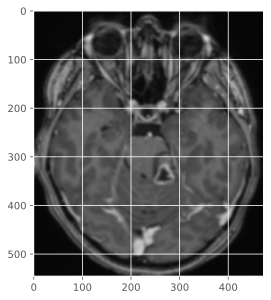

torch.Size([3, 546, 473])
torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Astrocitoma


['Astrocitoma']

In [ ]:
infer_and_show('/content/drive/Shareddrives/InterIIT/MRI Dataset combined_test/Astrocitoma /0a7e733123d397d830fe39f4c0fbd7_big_gallery.jpeg')

torch.Size([3, 630, 571])


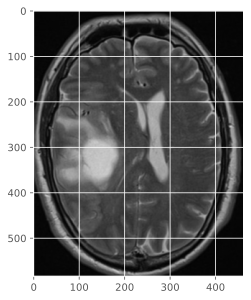

torch.Size([3, 584, 462])
torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])
Ependimoma


['Ependimoma']

In [ ]:
infer_and_show('/content/drive/Shareddrives/InterIIT/MRI Dataset combined_test/Ependimoma /0cad4138d83f289e6df0426cb6cd96_big_gallery.jpeg')

torch.Size([3, 630, 630])


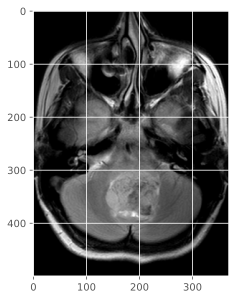

torch.Size([3, 500, 369])
torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])
Meduloblastoma


['Meduloblastoma']

In [ ]:
infer_and_show('/content/drive/Shareddrives/InterIIT/MRI Dataset combined_test/Meduloblastoma /03d58245edcfc179cbdea4c9f8807f_big_gallery.jpeg')

torch.Size([3, 630, 630])


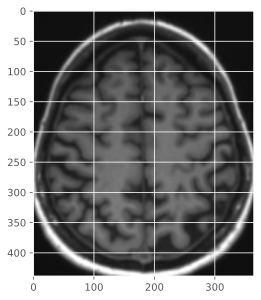

torch.Size([3, 439, 365])
torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])
Normal


['Normal']

In [ ]:
infer_and_show('/content/drive/Shareddrives/InterIIT/MRI Dataset combined_test/_NORMAL /03b8cddedf7fef67b544b2b2e546c9_big_gallery.jpeg')

torch.Size([3, 630, 549])


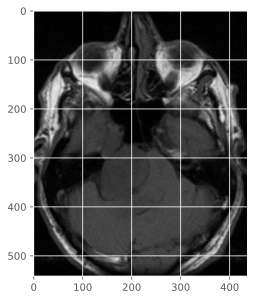

torch.Size([3, 542, 437])
torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])
Schwannoma


['Schwannoma']

In [ ]:
infer_and_show('/content/drive/Shareddrives/InterIIT/MRI Dataset combined_test/Schwannoma /fd2ce503e2d9212db9a5fe268f9884_big_gallery.jpg')

In [ ]:
def infer(img_path):
  img = Image.open(img_path).convert('RGB')
  convert_tensor = transforms.ToTensor()
  img = convert_tensor(img)
  img = cropper(img)
  img = transforms.Resize((224,224))(img)
  #img = img[None, :, :, :]
  img = img.unsqueeze(0)
  # res = torch.argmax(model_loaded(img),axis=1)
  # res=res.numpy()[0]
  # return mapping[res]
  _,res = torch.max(model_loaded(img),dim=1)
  return brain_data.encoder.classes_[res[0].item()]

In [ ]:
folder_path = '/content/drive/Shareddrives/InterIIT/unlabelled'

In [ ]:
image_info_dict = {}
i=0

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
        image_path = os.path.join(folder_path, filename)
        print(i)
        image_info_dict[filename] = infer(image_path)
        i=i+1

import pandas as pd

data = [(image_name, label) for image_name, label in image_info_dict.items()]

df = pd.DataFrame(data, columns=['image', 'label'])
print(df)
df.to_csv('/content/drive/Shareddrives/InterIIT/res_100_83.csv')

In [ ]:
brain_data.encoder.classes_

array(['Astrocitoma', 'Carcinoma', 'Ependimoma', 'Ganglioglioma',
       'Germinoma', 'Glioblastoma', 'Granuloma', 'Meduloblastoma',
       'Meningioma', 'Neurocitoma', 'Normal', 'Oligodendroglioma',
       'Papiloma', 'Schwannoma', 'Tuberculoma'], dtype=object)

In [ ]:
len(test_data)

374

In [ ]:
test_data

,img_path,label
0,/content/drive/Shareddrives/InterIIT/MRI Datas...,Astrocitoma
1,/content/drive/Shareddrives/InterIIT/MRI Datas...,Astrocitoma
2,/content/drive/Shareddrives/InterIIT/MRI Datas...,Astrocitoma
3,/content/drive/Shareddrives/InterIIT/MRI Datas...,Astrocitoma
4,/content/drive/Shareddrives/InterIIT/MRI Datas...,Astrocitoma
...,...,...
369,/content/drive/Shareddrives/InterIIT/MRI Datas...,Normal
370,/content/drive/Shareddrives/InterIIT/MRI Datas...,Normal
371,/content/drive/Shareddrives/InterIIT/MRI Datas...,Normal
372,/content/drive/Shareddrives/InterIIT/MRI Datas...,Normal


In [ ]:
len(test_data)

374

In [ ]:
test_data.y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8

In [ ]:
test_data.labels

0      Astrocitoma
1      Astrocitoma
2      Astrocitoma
3      Astrocitoma
4      Astrocitoma
          ...     
369         Normal
370         Normal
371         Normal
372         Normal
373         Normal
Name: label, Length: 374, dtype: object

In [ ]:
dict(zip(test_data.encoder.classes_,range(len(test_data.encoder.classes_)))) #mappings

{'Astrocitoma': 0,
 'Carcinoma': 1,
 'Ependimoma': 2,
 'Ganglioglioma': 3,
 'Germinoma': 4,
 'Glioblastoma': 5,
 'Granuloma': 6,
 'Meduloblastoma': 7,
 'Meningioma': 8,
 'Neurocitoma': 9,
 'Normal': 10,
 'Oligodendroglioma': 11,
 'Papiloma': 12,
 'Schwannoma': 13,
 'Tuberculoma': 14}

In [ ]:
test_data.encoder.classes_

array(['Astrocitoma', 'Carcinoma', 'Ependimoma', 'Ganglioglioma',
       'Germinoma', 'Glioblastoma', 'Granuloma', 'Meduloblastoma',
       'Meningioma', 'Neurocitoma', 'Normal', 'Oligodendroglioma',
       'Papiloma', 'Schwannoma', 'Tuberculoma'], dtype=object)

In [ ]:
test_data.encoder.classes_

array(['Astrocitoma', 'Carcinoma', 'Ependimoma', 'Ganglioglioma',
       'Germinoma', 'Glioblastoma', 'Granuloma', 'Meduloblastoma',
       'Meningioma', 'Neurocitoma', 'Normal', 'Oligodendroglioma',
       'Papiloma', 'Schwannoma', 'Tuberculoma'], dtype=object)

In [ ]:
for data,true_labels in test_loader:
  print(data.shape)
  print(type(data))
  print(true_labels.shape)
  break

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning:

The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning:

The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tens

torch.Size([32, 3, 224, 224])
<class 'torch.Tensor'>
torch.Size([32])
